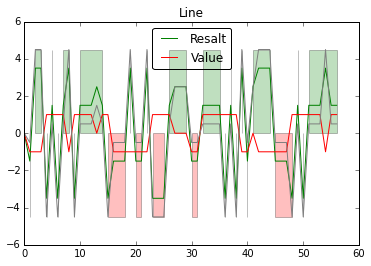

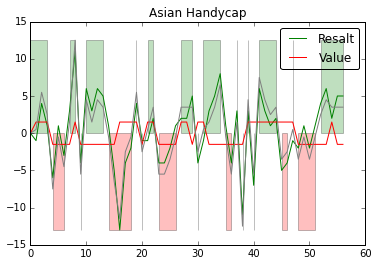

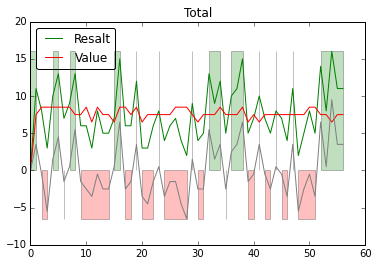

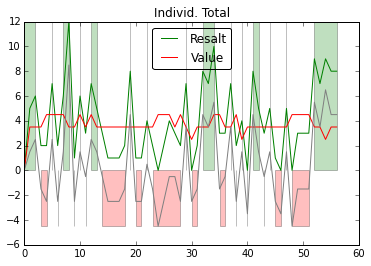

In [5]:
%matplotlib inline
import numpy as np
from pymongo import MongoClient
import matplotlib.pyplot as plt
import matplotlib.collections as collections

client = MongoClient("mongodb://localhost:27017/")
db = client["delta_test"]

name = "Kansas City Royals"
match_list = db.matches.find({'league': 'mlb', 'season': '2015', 'seas_type': 'season',
                              '$or': [{'home.team': name}, {'away.team': name}]})\
                              .sort([('date.stamp', 1)])

# arry = [[[0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0]],
#         [[0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0]]]
arry = [[[0.0] for n in range(3)] for m in range(4)]
labels = ['Line', 'Asian Handycap', 'Total', 'Individ. Total']

for match in match_list:
    place = 'home' if match['home']['team'] == name else 'away'
    m = match[place]["ftot"]    

    for n in range(4):
        arry[n][0].append(m["resalt"][n])
        arry[n][1].append(m["odd_val"][n])
        arry[n][2].append(m["delta"][n])

for i in range(4):
    r = arry[i]
    fig, ax = plt.subplots()
    ax.set_title(labels[i])
    X, d_Y = range(len(r[0])), np.array(r[2])

    ax.plot(X, r[0], color='green', label = 'Resalt')
    ax.plot(X, r[1], color='red', label = 'Value')
    ax.plot(X, r[2], color='gray', ls = '-')
    
    m_arr = r[0] + r[1] + r[2]
    max_haight, min_haight = max(m_arr), min(m_arr)
    
    collection = collections.BrokenBarHCollection.span_where(
        X, ymin=0, ymax=max_haight, where=d_Y >= 0, facecolor='green', alpha=0.25)
    ax.add_collection(collection)
    collection = collections.BrokenBarHCollection.span_where(
        X, ymin=min_haight, ymax=0, where=d_Y < 0, facecolor='red', alpha=0.25)
    ax.add_collection(collection)
    
    ax.legend(loc='best', fancybox=True)
